In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("predict.csv")
df.head()

,N,Z,A,m,be,be_RFR,be_XGB,be_MLP,BE_SEMF,be_a_semf,be_a_RFR,be_a_XGB,be_a_MLP,be_a
0,0,1,1,1.007825,0.047824,-1.839576,-2.028259,0.648924,-25.750000,-25.750000,-1.839576,-2.028259,0.648924,0.047824
1,3,3,6,6.015123,32.121926,28.064957,30.711208,33.937543,33.378025,5.563004,4.677493,5.118535,5.656257,5.353654
2,6,1,7,7.052749,6.628534,22.036381,17.659521,9.205379,-39.528499,-5.646928,3.148054,2.522789,1.315054,0.946933
3,3,5,8,8.024607,37.957770,39.437965,46.731680,41.712099,35.840000,4.480000,4.929746,5.841460,5.214012,4.744721
4,6,2,8,8.033922,31.489495,34.351936,40.641950,26.633133,6.689000,0.836125,4.293992,5.080244,3.329142,3.936187


<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_42117/2516203523.py:17: SyntaxWarning: invalid escape sequence '\m'
  ax0.set_ylabel('$BE_\mathrm{actual}$ - $BE_\mathrm{pred}$(MeV)',fontsize=9)
/tmp/ipykernel_42117/2516203523.py:23: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_ylabel('$BE_\mathrm{actual}$ - $BE_\mathrm{pred}$(MeV)',fontsize=9)
/tmp/ipykernel_42117/2516203523.py:29: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('$BE_\mathrm{actual}$ - $BE_\mathrm{pred}$(MeV)',fontsize=9)
/tmp/ipykernel_42117/2516203523.py:35: SyntaxWarning: invalid escape sequence '\m'
  ax3.set_ylabel('$BE_\mat

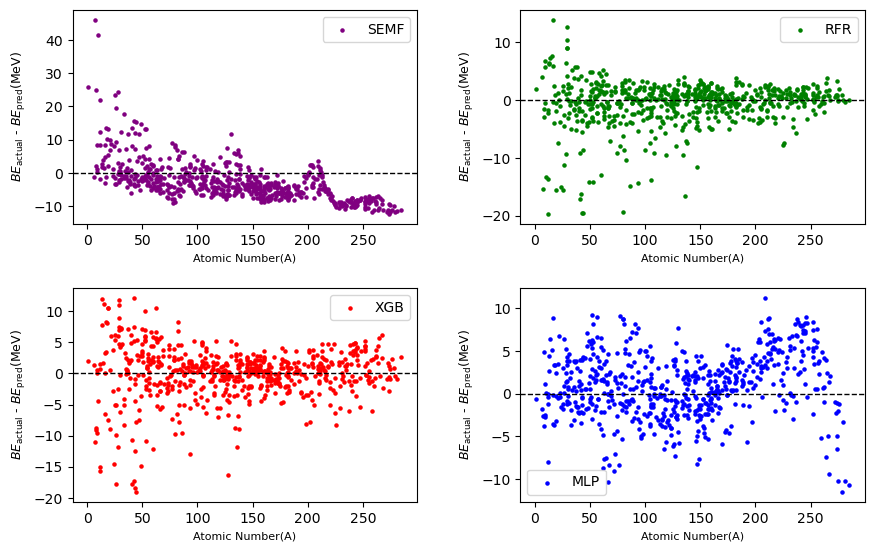

In [4]:
error_semf =  df.be - df.BE_SEMF
error_rfr =  df. be - df.be_RFR
error_xgb =  df.be - df.be_XGB
error_mnn =  df.be - df.be_MLP
fig = plt.figure(figsize=(16,10))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])



ax0.scatter(df.A,error_semf,color = "purple", label ="SEMF",s = 5)
ax0.set_xlabel("Atomic Number(A)",fontsize=8)
ax0.set_ylabel('$BE_\mathrm{actual}$ - $BE_\mathrm{pred}$(MeV)',fontsize=9)
ax0.axhline(0, color='black', lw=1, linestyle ="--")
ax0.legend();

ax1.scatter(df.A,error_rfr,color = "green", label ="RFR",s = 5)
ax1.set_xlabel("Atomic Number(A)",fontsize=8)
ax1.set_ylabel('$BE_\mathrm{actual}$ - $BE_\mathrm{pred}$(MeV)',fontsize=10)
ax1.axhline(0, color='black', lw=1, linestyle ="--")
ax1.legend();

ax2.scatter(df.A,error_xgb,color = "red", label ="XGB",s = 5)
ax2.set_xlabel("Atomic Number(A)",fontsize=8)
ax2.set_ylabel('$BE_\mathrm{actual}$ - $BE_\mathrm{pred}$(MeV)',fontsize=10)
ax2.axhline(0, color='black', lw=1, linestyle ="--")
ax2.legend();

ax3.scatter(df.A,error_mnn,color = "blue", label ="MLP",s = 5)
ax3.set_xlabel("Atomic Number(A)",fontsize=8)
ax3.set_ylabel('$BE_\mathrm{actual}$ - $BE_\mathrm{pred}$(MeV)',fontsize=9)
ax3.axhline(0, color='black', lw=1, linestyle ="--")
ax3.legend();
plt.savefig("be1.png",dpi=600, bbox_inches='tight')
plt.show()


In [5]:
m_P= 1.0078764
m_N= 1.0086654
#calculating binding energy per nucleon using atomic df evaluation

df["df_pred"] = df['Z']* m_P + df['N']* m_N - df.be_RFR/931
df["df_predx"] = df['Z']* m_P + df['N']* m_N - df.be_XGB/931
df["df_semf"] = df['Z']* m_P + df['N']* m_N - df.BE_SEMF/931
df["df_mnn"] = df['Z']* m_P + df['N']* m_N - df.be_MLP/931
df.head()

,N,Z,A,m,be,be_RFR,be_XGB,be_MLP,BE_SEMF,be_a_semf,be_a_RFR,be_a_XGB,be_a_MLP,be_a,df_pred,df_predx,df_semf,df_mnn
0,0,1,1,1.007825,0.047824,-1.839576,-2.028259,0.648924,-25.750000,-25.750000,-1.839576,-2.028259,0.648924,0.047824,1.009852,1.010055,1.035535,1.007179
1,3,3,6,6.015123,32.121926,28.064957,30.711208,33.937543,33.378025,5.563004,4.677493,5.118535,5.656257,5.353654,6.019480,6.016638,6.013774,6.013173
2,6,1,7,7.052749,6.628534,22.036381,17.659521,9.205379,-39.528499,-5.646928,3.148054,2.522789,1.315054,0.946933,7.036199,7.040900,7.102327,7.049981
3,3,5,8,8.024607,37.957770,39.437965,46.731680,41.712099,35.840000,4.480000,4.929746,5.841460,5.214012,4.744721,8.023017,8.015183,8.026882,8.020575
4,6,2,8,8.033922,31.489495,34.351936,40.641950,26.633133,6.689000,0.836125,4.293992,5.080244,3.329142,3.936187,8.030847,8.024091,8.060560,8.039138


In [7]:
error_semf1 =  df.m - df.df_semf
error_rfr1 =  df.m - df.df_pred
error_xgb1 =  df.m - df.df_predx
error_mnn1 =  df.m - df.df_mnn

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_42117/341465192.py:13: SyntaxWarning: invalid escape sequence '\m'
  ax0.set_ylabel('$MASS_\mathrm{actual}$ - $MASS_\mathrm{pred}$(amu)',fontsize=9)
/tmp/ipykernel_42117/341465192.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_ylabel('$MASS_\mathrm{actual}$ - $MASS_\mathrm{pred}$(amu)',fontsize=9)
/tmp/ipykernel_42117/341465192.py:26: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('$MASS_\mathrm{actual}$ - $MASS_\mathrm{pred}$(amu)',fontsize=9)
/tmp/ipykernel_42117/341465192.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax3.set_ylabel('

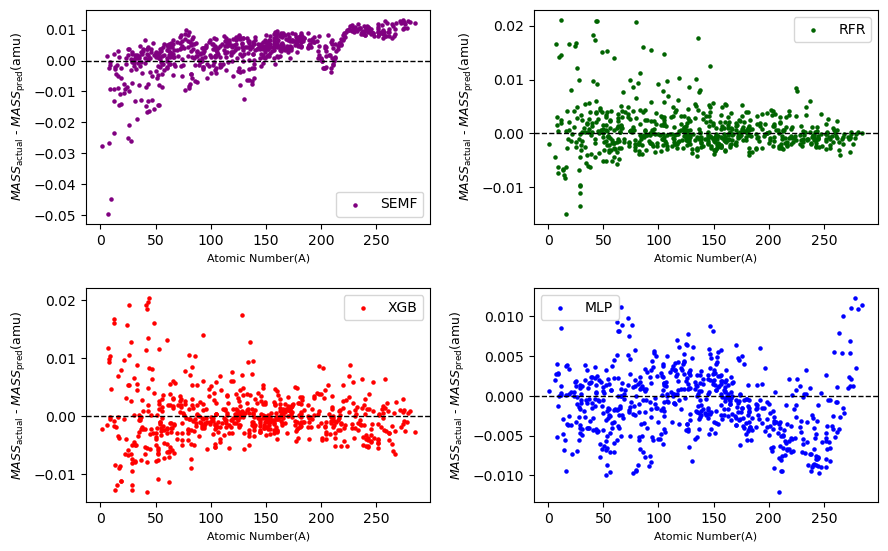

In [8]:

fig = plt.figure(figsize=(16,10))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])



ax0.scatter(df.A,error_semf1,color = "purple", label ="SEMF",s = 5)
ax0.set_xlabel("Atomic Number(A)",fontsize=8)
ax0.set_ylabel('$MASS_\mathrm{actual}$ - $MASS_\mathrm{pred}$(amu)',fontsize=9)
ax0.axhline(0, color='black', lw=1, linestyle ="--")
ax0.legend();


ax1.scatter(df.A,error_rfr1,color = "darkgreen", label ="RFR",s = 5)
ax1.set_xlabel("Atomic Number(A)",fontsize=8)
ax1.set_ylabel('$MASS_\mathrm{actual}$ - $MASS_\mathrm{pred}$(amu)',fontsize=9)
ax1.axhline(0, color='black', lw=1, linestyle ="--")
ax1.legend();

ax2.scatter(df.A,error_xgb1,color = "red", label ="XGB",s = 5)
ax2.set_xlabel("Atomic Number(A)",fontsize=8)
ax2.set_ylabel('$MASS_\mathrm{actual}$ - $MASS_\mathrm{pred}$(amu)',fontsize=9)
ax2.axhline(0, color='black', lw=1, linestyle ="--")
ax2.legend();

ax3.scatter(df.A,error_mnn1,color = "blue", label ="MLP",s = 5)
ax3.set_xlabel("Atomic Number(A)",fontsize=8)
ax3.set_ylabel('$MASS_\mathrm{actual}$ - $MASS_\mathrm{pred}$(amu)',fontsize=9)
ax3.axhline(0, color='black', lw=1, linestyle ="--")
ax3.legend();
plt.savefig("mass.png",dpi=600, bbox_inches='tight')
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,mean_squared_error, r2_score
small_df = df[df["A"]<=50]
rmse_semf = np.sqrt(mean_squared_error(small_df.be,small_df.BE_SEMF))
mae_semf = mean_absolute_error(small_df.be,small_df.BE_SEMF)
print("MAE_SEMF =",mae_semf,",RMSE_SEMF =",rmse_semf)
rmse_RFR = np.sqrt(mean_squared_error(small_df.be,small_df.be_RFR))
mae_RFR = mean_absolute_error(small_df.be,small_df.be_RFR)
print("MAE_RFR =",mae_RFR,",RMSE_RFR =",rmse_RFR)
rmse_XGB = np.sqrt(mean_squared_error(small_df.be,small_df.be_XGB))
mae_XGB = mean_absolute_error(small_df.be,small_df.be_XGB)
print("MAE_XGB =",mae_XGB,",RMSE_XGB =",rmse_XGB)
rmse_MNN = np.sqrt(mean_squared_error(small_df.be,small_df.be_MLP))
mae_MNN = mean_absolute_error(small_df.be,small_df.be_MLP)
print("MAE_MNN =",mae_MNN,",RMSE_MNN =",rmse_MNN)

MAE_SEMF = 6.402198187379996 ,RMSE_SEMF = 10.35575488910577
MAE_RFR = 5.06956092581 ,RMSE_RFR = 7.180115049213341
MAE_XGB = 6.192777327880004 ,RMSE_XGB = 7.788342620682935
MAE_MNN = 2.4697973531100006 ,RMSE_MNN = 3.128247961092158


In [8]:
heavy_df = df[df["A"]>=150]
rmse_semf = np.sqrt(mean_squared_error(heavy_df.be,heavy_df.BE_SEMF))
mae_semf = mean_absolute_error(heavy_df.be,heavy_df.BE_SEMF)
print("MAE_SEMF =",mae_semf,",RMSE_SEMF =",rmse_semf)
rmse_RFR = np.sqrt(mean_squared_error(heavy_df.be,heavy_df.be_RFR))
mae_RFR = mean_absolute_error(heavy_df.be,heavy_df.be_RFR)
print("MAE_RFR =",mae_RFR,",RMSE_RFR =",rmse_RFR)
rmse_XGB = np.sqrt(mean_squared_error(heavy_df.be,heavy_df.be_XGB))
mae_XGB = mean_absolute_error(heavy_df.be,heavy_df.be_XGB)
print("MAE_XGB =",mae_XGB,",RMSE_XGB =",rmse_XGB)
rmse_MNN = np.sqrt(mean_squared_error(heavy_df.be,heavy_df.be_MLP))
mae_MNN = mean_absolute_error(heavy_df.be,heavy_df.be_MLP)
print("MAE_MNN =",mae_MNN,",RMSE_MNN =",rmse_MNN)


MAE_SEMF = 6.28407848659004 ,RMSE_SEMF = 6.925915162757827
MAE_RFR = 1.4928856819923308 ,RMSE_RFR = 1.950352782519926
MAE_XGB = 1.9861059770114915 ,RMSE_XGB = 2.5487038298961924
MAE_MNN = 3.4532628659003737 ,RMSE_MNN = 4.296836612862132


In [9]:
medium_df = df[(df["A"] > 50) & (df["A"] < 150)]
rmse_semf = np.sqrt(mean_squared_error(medium_df.be,medium_df.BE_SEMF))
mae_semf = mean_absolute_error(medium_df.be,medium_df.BE_SEMF)
print("MAE_SEMF =",mae_semf,",RMSE_SEMF =",rmse_semf)
rmse_RFR = np.sqrt(mean_squared_error(medium_df.be,medium_df.be_RFR))
mae_RFR = mean_absolute_error(medium_df.be,medium_df.be_RFR)
print("MAE_RFR =",mae_RFR,",RMSE_RFR =",rmse_RFR)
rmse_XGB = np.sqrt(mean_squared_error(medium_df.be,medium_df.be_XGB))
mae_XGB = mean_absolute_error(medium_df.be,medium_df.be_XGB)
print("MAE_XGB =",mae_XGB,",RMSE_XGB =",rmse_XGB)
rmse_MNN = np.sqrt(mean_squared_error(medium_df.be,medium_df.be_MLP))
mae_MNN = mean_absolute_error(medium_df.be,medium_df.be_MLP)
print("MAE_MNN =",mae_MNN,",RMSE_MNN =",rmse_MNN)

MAE_SEMF = 3.69847194870849 ,RMSE_SEMF = 4.357697424926722
MAE_RFR = 2.6038563162361625 ,RMSE_RFR = 3.889781315750105
MAE_XGB = 2.7002578243542477 ,RMSE_XGB = 3.708526342493632
MAE_MNN = 2.96704900848709 ,RMSE_MNN = 3.7395638134360243


In [10]:
rmsd

NameError: name 'rmsd' is not defined